# Hierarchical series with different levels of granularity

## Hierarchical Time Series Forecasting & Reconciliation
*It has the following steps:*
- Building Hierarchical Time Series
- Hierarchical Forecasting
- Forecast reconciliation
## Time Series at top levels have noticeable trends and seasonality. We built time series models on each time series using ARIMA.
- we took seasonality and trends into consideration when modeling
- we used automatic selection of parameters for ARIMA model
## We tried 3 such simplified reconciliaton strategies: 
- BU, 
- OLS, 
- Mint


In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import plotly.express as px


file_path = '/home/olga/ts_year_project/TimeSeriesMasters2023/eda_olga/energy_hourly_dataset_2012.csv'
df = pd.read_csv(file_path)
# df

In [185]:
#df.set_index('date', inplace=True)

In [186]:
is_unique = df['date'].duplicated().any()
is_unique

False

In [187]:
df.reset_index(inplace=True)

In [188]:
# fig = px.line(df, x='date', y='value', labels={'value': 'Потребление электроэнергии'}, title='Потребление электроэнергии по часам')
# fig.show()

In [189]:
# df.index = pd.to_datetime(df.index)

In [190]:
# df.reset_index(inplace=True)

In [191]:
# df.info()

In [192]:
def transform_to_custom_freq(df, freq):
    df['value'] = pd.to_numeric(df['value'], errors='coerce')
    # df.set_index('date', inplace=True)
    df_resampled = df.resample(freq).sum()
    # df_resampled.reset_index(inplace=True)
    
    return df_resampled

## week

In [193]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [194]:
# df

In [195]:
selected_freq = 'W'
df_resampled_week = transform_to_custom_freq(df, selected_freq)
# df_resampled_week

## Daily

In [196]:
# df

In [197]:
df.reset_index(inplace=True)

In [198]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
# df

In [199]:
selected_freq = 'D'
df_resampled_day = transform_to_custom_freq(df, selected_freq)
# df_resampled_day

## по месяцам

In [200]:
df.reset_index(inplace=True)

In [201]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [202]:
# df.reset_index(inplace=True)
selected_freq = 'M'
df_resampled_month = transform_to_custom_freq(df, selected_freq)
# df_resampled_month

In [203]:
df_resampled_month.reset_index(inplace=True)

In [204]:
# df_resampled_month

In [205]:
# fig = px.line(df_resampled_month, x='date', y='value', labels={'value': 'Потребление электроэнергии'}, title='Потребление электроэнергии по месяцам')
# fig.show()

In [206]:
# df

## mins

In [207]:
df.reset_index(inplace=True)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [208]:
selected_freq = 'T'
df_resampled_min = transform_to_custom_freq(df, selected_freq)
# df_resampled_min

In [209]:
df_resampled_min['value'] = df_resampled_min['value'].replace(0.0, np.nan)
# df_resampled_min

In [210]:
df_resampled_min['value'] = df_resampled_min['value'].interpolate(method='linear')
# df_resampled_min

In [211]:
df_resampled_min.reset_index(inplace=True)

In [212]:
# fig = px.line(df_resampled_min, x='date', y='value', labels={'value': 'Потребление электроэнергии'}, title='Потребление электроэнергии по минутам')
# fig.show()

In [213]:
# df_resampled_min

## mins15

In [214]:
df.reset_index(inplace=True)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [215]:
selected_freq = '15T'
df_resampled_15min = transform_to_custom_freq(df, selected_freq)
# df_resampled_15min

In [216]:
df_resampled_15min['value'] = df_resampled_15min['value'].replace(0.0, np.nan)
# df_resampled_15min

In [217]:
df_resampled_15min['value'] = df_resampled_15min['value'].interpolate(method='linear')
# df_resampled_15min

In [218]:
df_resampled_15min.reset_index(inplace=True)

In [219]:
# fig = px.line(df_resampled_15min, x='date', y='value', labels={'value': 'Потребление электроэнергии'}, title='Потребление электроэнергии по 15 минутному интервалу')
# fig.show()

## Обучение моделей на каждой гранулярности

In [220]:
from statsmodels.tsa.arima.model import ARIMA
# from fbprophet import Prophet

In [221]:
!pip install statsmodels
#!python -m pip install prophet

In [222]:
# !python -m pip install fbprophet

In [223]:
from pmdarima import auto_arima

In [224]:
!pip install pmdarima

## hour

In [225]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [226]:
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

In [227]:
auto_arima_model = auto_arima(train['value'], seasonal=True, stepwise=True, suppress_warnings=True)

In [228]:
auto_arima_model.order

(3, 0, 2)

In [229]:
auto_arima_model.seasonal_order

(0, 0, 0, 0)

In [230]:
print(f'ARIMA Order: {auto_arima_model.order}')
print(f'ARIMA Seasonal Order: {auto_arima_model.seasonal_order}')

ARIMA Order: (3, 0, 2)
ARIMA Seasonal Order: (0, 0, 0, 0)


In [231]:
fitted_model = auto_arima_model.fit(train['value'])

In [232]:
forecast_hour = fitted_model.predict(n_periods=len(test))

In [233]:
mae = mean_absolute_error(test['value'], forecast_hour)
mse = mean_squared_error(test['value'], forecast_hour)

In [234]:
print(f'Test Mean Absolute Error: {mae}')
print(f'Test Mean Squared Error: {mse}')

Test Mean Absolute Error: 18.296752543658766
Test Mean Squared Error: 587.6226961867825


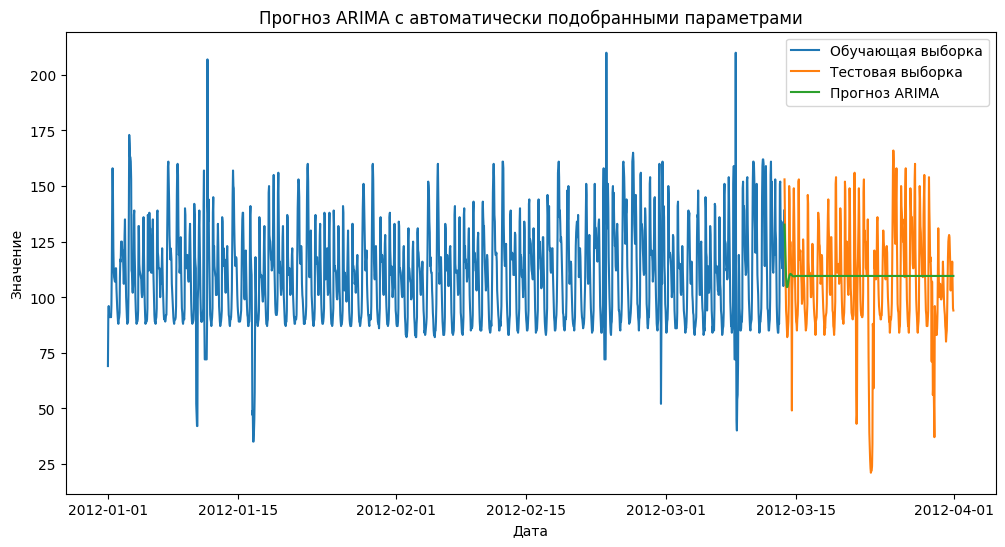

In [235]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['value'], label='Обучающая выборка')
plt.plot(test.index, test['value'], label='Тестовая выборка')
plt.plot(test.index, forecast_hour, label='Прогноз ARIMA')
plt.title('Прогноз ARIMA с автоматически подобранными параметрами')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.show()

## 15min

In [236]:
train_size = int(len(df_resampled_15min) * 0.8)
train, test = df_resampled_15min.iloc[:train_size], df_resampled_15min.iloc[train_size:]
# Подбор параметров с использованием pmdarima
auto_arima_model = auto_arima(train['value'], seasonal=True, stepwise=True, suppress_warnings=True)
auto_arima_model.order

(2, 1, 2)

In [237]:
auto_arima_model.seasonal_order

(0, 0, 0, 0)

In [238]:
print(f'ARIMA Order: {auto_arima_model.order}')
print(f'ARIMA Seasonal Order: {auto_arima_model.seasonal_order}')

fitted_model = auto_arima_model.fit(train['value'])

forecast_15min = fitted_model.predict(n_periods=len(test))

mae = mean_absolute_error(test['value'], forecast_15min)
mse = mean_squared_error(test['value'], forecast_15min)
print(f'Test Mean Absolute Error: {mae}')
print(f'Test Mean Squared Error: {mse}')

ARIMA Order: (2, 1, 2)
ARIMA Seasonal Order: (0, 0, 0, 0)
Test Mean Absolute Error: 39.139577809256764
Test Mean Squared Error: 2038.3290072022555


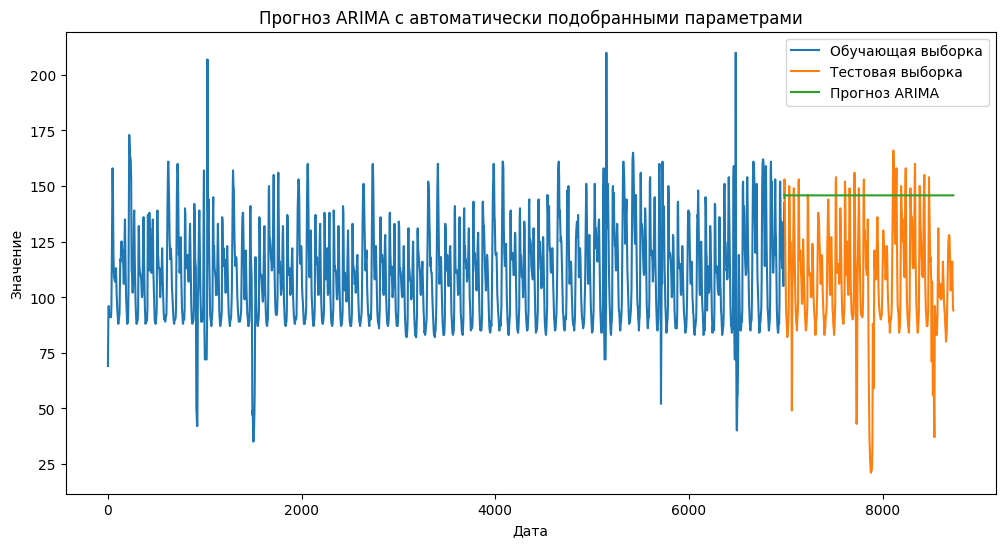

In [239]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['value'], label='Обучающая выборка')
plt.plot(test.index, test['value'], label='Тестовая выборка')
plt.plot(test.index, forecast_15min, label='Прогноз ARIMA')
plt.title('Прогноз ARIMA с автоматически подобранными параметрами')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.show()

## min

In [240]:
train_size = int(len(df_resampled_min) * 0.8)
train, test = df_resampled_min.iloc[:train_size], df_resampled_min.iloc[train_size:]
auto_arima_model = auto_arima(train['value'], seasonal=True, stepwise=True, suppress_warnings=True)
auto_arima_model.order

(5, 1, 0)

In [241]:
auto_arima_model.seasonal_order

(0, 0, 0, 0)

ARIMA Order: (5, 1, 0)
ARIMA Seasonal Order: (0, 0, 0, 0)
Test Mean Absolute Error: 52.47072011640191
Test Mean Squared Error: 3309.2377306218973


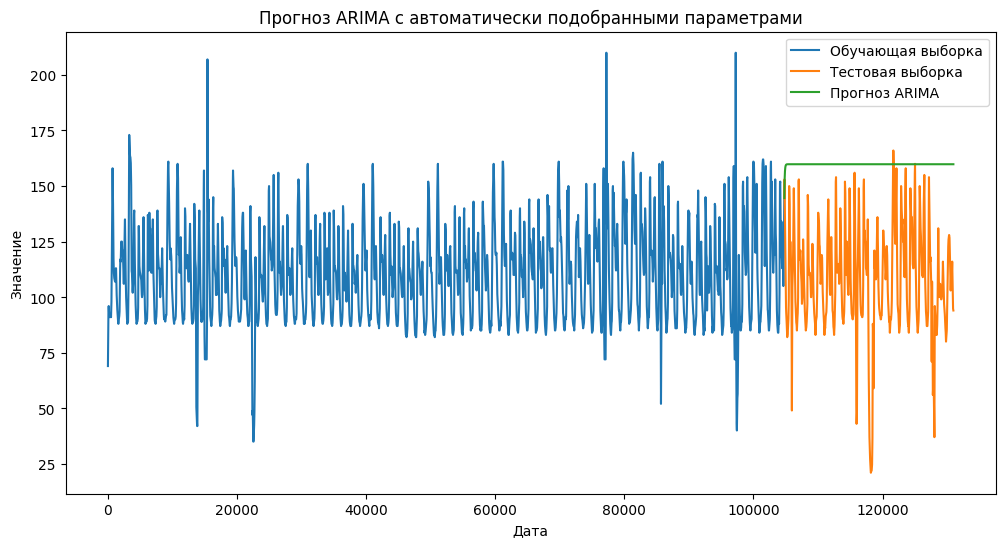

In [242]:
print(f'ARIMA Order: {auto_arima_model.order}')
print(f'ARIMA Seasonal Order: {auto_arima_model.seasonal_order}')
fitted_model = auto_arima_model.fit(train['value'])

forecast_min = fitted_model.predict(n_periods=len(test))

mae = mean_absolute_error(test['value'], forecast_min)
mse = mean_squared_error(test['value'], forecast_min)
print(f'Test Mean Absolute Error: {mae}')
print(f'Test Mean Squared Error: {mse}')

plt.figure(figsize=(12, 6))
plt.plot(train.index, train['value'], label='Обучающая выборка')
plt.plot(test.index, test['value'], label='Тестовая выборка')
plt.plot(test.index, forecast_min, label='Прогноз ARIMA')
plt.title('Прогноз ARIMA с автоматически подобранными параметрами')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.show()

## week

(0, 0, 0)
(0, 0, 0, 0)
ARIMA Order: (0, 0, 0)
ARIMA Seasonal Order: (0, 0, 0, 0)
Test Mean Absolute Error: 1260.5757575757586
Test Mean Squared Error: 1685585.7107438035


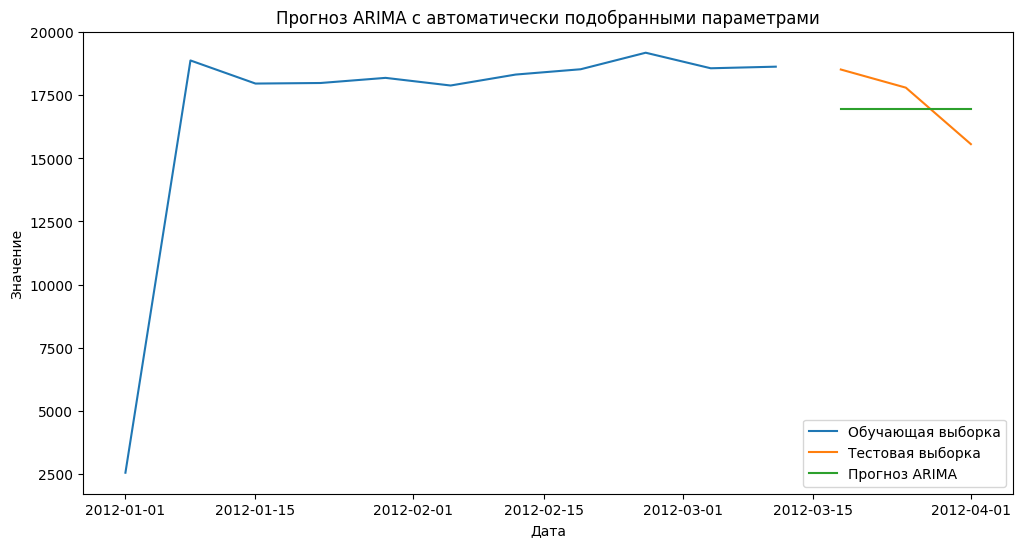

In [243]:
train_size = int(len(df_resampled_week) * 0.8)
train, test = df_resampled_week.iloc[:train_size], df_resampled_week.iloc[train_size:]

auto_arima_model = auto_arima(train['value'], seasonal=True, stepwise=True, suppress_warnings=True)
print(auto_arima_model.order)
print(auto_arima_model.seasonal_order)

print(f'ARIMA Order: {auto_arima_model.order}')
print(f'ARIMA Seasonal Order: {auto_arima_model.seasonal_order}')

fitted_model = auto_arima_model.fit(train['value'])

forecast_week = fitted_model.predict(n_periods=len(test))

mae = mean_absolute_error(test['value'], forecast_week)
mse = mean_squared_error(test['value'], forecast_week)
print(f'Test Mean Absolute Error: {mae}')
print(f'Test Mean Squared Error: {mse}')

plt.figure(figsize=(12, 6))
plt.plot(train.index, train['value'], label='Обучающая выборка')
plt.plot(test.index, test['value'], label='Тестовая выборка')
plt.plot(test.index, forecast_week, label='Прогноз ARIMA')
plt.title('Прогноз ARIMA с автоматически подобранными параметрами')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.show()

## day

(0, 0, 1)
(0, 0, 0, 0)
ARIMA Order: (0, 0, 1)
ARIMA Seasonal Order: (0, 0, 0, 0)
Test Mean Absolute Error: 142.67056539605065
Test Mean Squared Error: 41674.07603437521


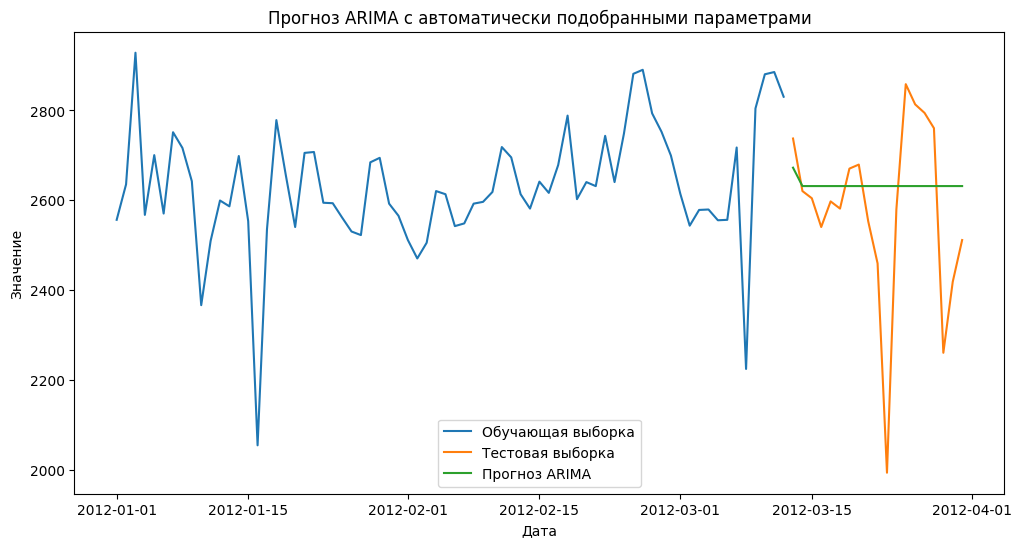

In [244]:
train_size = int(len(df_resampled_day) * 0.8)
train, test = df_resampled_day.iloc[:train_size], df_resampled_day.iloc[train_size:]

auto_arima_model = auto_arima(train['value'], seasonal=True, stepwise=True, suppress_warnings=True)
print(auto_arima_model.order)
print(auto_arima_model.seasonal_order)

print(f'ARIMA Order: {auto_arima_model.order}')
print(f'ARIMA Seasonal Order: {auto_arima_model.seasonal_order}')

fitted_model = auto_arima_model.fit(train['value'])

forecast_day = fitted_model.predict(n_periods=len(test))

mae = mean_absolute_error(test['value'], forecast_day)
mse = mean_squared_error(test['value'], forecast_day)
print(f'Test Mean Absolute Error: {mae}')
print(f'Test Mean Squared Error: {mse}')

plt.figure(figsize=(12, 6))
plt.plot(train.index, train['value'], label='Обучающая выборка')
plt.plot(test.index, test['value'], label='Тестовая выборка')
plt.plot(test.index, forecast_day, label='Прогноз ARIMA')
plt.title('Прогноз ARIMA с автоматически подобранными параметрами')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.show()

## Смешиваем прогнозы

In [245]:
# forecast_day

In [246]:
df_day = pd.DataFrame({'value': forecast_day.values})
# df_day

In [247]:
# forecast_hour

In [248]:
df_hour = pd.DataFrame({'value': forecast_hour.values})
# df_hour

In [249]:
# forecast_week

In [250]:
df_week = pd.DataFrame({'value': forecast_week.values})
# df_week

In [251]:
# forecast_15min

In [252]:
df_15min = pd.DataFrame({'value': forecast_15min.values})
# df_15min

In [253]:
# forecast_min

In [254]:
df_min = pd.DataFrame({'value': forecast_min.values})
# df_min

## интерполируем все предсказания до равных размеров, чтобы смешать

In [255]:
from scipy.interpolate import interp1d

In [256]:
# def blend_forecasts(predictions_list, weights_list):
#     blended_forecast = np.average(predictions_list, axis=0, weights=weights_list)
#     return blended_forecast
# # Пример взвешенного усреднения с разными весами
# weights = [0.4, 0.3, 0.2, 0.1]
# blended_forecast = blend_forecasts([forecast_day, forecast_hour, forecast_week, forecast_min, forecast_15min], weights)

In [257]:
# # Оценка качества модели на тестовой выборке
# mae = mean_absolute_error(test['value'], blended_forecast)
# mse = mean_squared_error(test['value'], blended_forecast)
# print(f'Test Mean Absolute Error: {mae}')
# print(f'Test Mean Squared Error: {mse}')
# # Вывод графика с обучающей, тестовой выборкой и прогнозом
# plt.figure(figsize=(12, 6))
# plt.plot(train.index, train['value'], label='Обучающая выборка')
# plt.plot(test.index, test['value'], label='Тестовая выборка')
# plt.plot(test.index, forecast_day, label='Прогноз ARIMA')
# plt.title('Прогноз ARIMA с автоматически подобранными параметрами')
# plt.xlabel('Дата')
# plt.ylabel('Значение')
# plt.legend()
# plt.show()

## Применяем реконсиляцию методами bu, ols, mint

## Смешиваем прогнозы еще раз

## Сравниваем результаты base и после реконсиляции

## Выводы

- Hierarchical Forecasting & Reconciliation should improve the overall prediction of intermittent time series with correct reconciliation strategy
- Hierarchical Forecasting & Reconciliation can apply to any time series with a hierarchy structure

## HTS offers a lot of flexibilities:
- Assist to build hierarchical time series from every level data
- We can choose different ML algorithms for different levels of hierarchical time series
- 3 reconciliation strategies are available at this moment.


In [258]:
!pip install --upgrade nbformat